<a href="https://colab.research.google.com/github/BilalELOTMANI/Schizophrenia-Like-Disorders/blob/main/Report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [1]:
import pandas as pd

filepath = '/content/drive/MyDrive/Fiverrprojects/ML_Dataset.csv'
data = pd.read_csv(filepath)

In [2]:
data.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


In [3]:
data.shape

(5000, 27)

# Handling Missing, Duplicate and Outlier Values:

---

Handling Missing, Duplicate, and Outlier Data Points is a Vital Step in Data Preprocessing. This section covers techniques for managing these data points. We start by filling missing values with the column mean, using the `fillna()` function from the numpy library. Although this is a straightforward method, it may not always be optimal. Alternative techniques like interpolation, forward-fill, backward-fill, etc. may be more appropriate depending on the dataset and problem at hand.

After handling missing values, we address duplicates. The `drop_duplicates()` function from pandas is used to remove any duplicate rows. This helps maintain a clean dataset with unique observations.

The final step in preprocessing is to manage outlier values. Outliers are data points that deviate significantly from the rest of the observations. Here, we use the standard deviation of numerical columns and retain only those within 2 standard deviations of the column mean. This is a commonly adopted method for outlier management, which helps eliminate observations significantly different from the majority of the data. This step is crucial as outliers can greatly impact model performance.

In [4]:
import numpy as np

# Replace missing values with mean of the column
data.fillna(data.mean(), inplace=True) 

# Remove duplicated rows
data.drop_duplicates(inplace=True) # 

<ipython-input-4-68619286ac4f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [5]:
# Handle outlier values
cols = data.select_dtypes(['float32']).columns # select numerical columns
for col in cols:
    mean, std = data[col].mean(), data[col].std()
    data = data[(data[col] > mean - 2*std) & (data[col] < mean + 2*std)] # keep only values within 2 standard deviations of mean

In [6]:
data.shape

(5000, 27)

## Data Transformation: Scaling and Normalization


Data Transformation: A crucial aspect of preprocessing is transforming the data. This involves scaling and normalizing the data to have consistent units and ranges. The code starts by handling infinite values by replacing them with a predefined value (-999).

Afterwards, normalization is performed using the `MinMaxScaler` from the `sklearn.preprocessing` library. This scales the numerical columns of the data between a specific range, typically between 0 and 1. The scaler is first fitted to the data and then used to transform the data.

Both outliers and the entire data are handled using the `MinMaxScaler` to ensure consistent units and ranges. Proper handling of outliers and normalization is critical to the performance of the model

In [7]:
data.replace([np.inf, -np.inf], -999, inplace=True)
data

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,2.754909,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,2.754909,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,2.754909,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,7.860754,2.336196,19.357732,6.025528,0.010833,Yes,1.943012,10.131561,6.025528,...,Hispanic,8.431264,Female,5.070006,3.660955,2.754909,3.545347,4.552549,2.427987,2.622951
4996,0,10.172056,1.385703,12.605660,4.513683,0.191444,Yes,0.443218,6.935870,4.513683,...,Black,5.391609,Female,8.067497,8.071709,3.933825,6.263030,1.482647,2.649173,2.090298
4997,1,4.880272,0.311701,39.005728,6.817671,0.003989,Yes,3.770044,5.107938,6.817671,...,Black,4.959354,Male,6.460624,8.691664,2.754909,6.573167,4.382728,0.183887,7.550087
4998,1,7.288783,4.135178,38.522660,7.611236,0.123641,No,0.703623,5.528039,7.611236,...,Asian,4.915460,Female,8.015376,7.094015,1.884874,7.059948,4.230738,3.460764,-0.163929


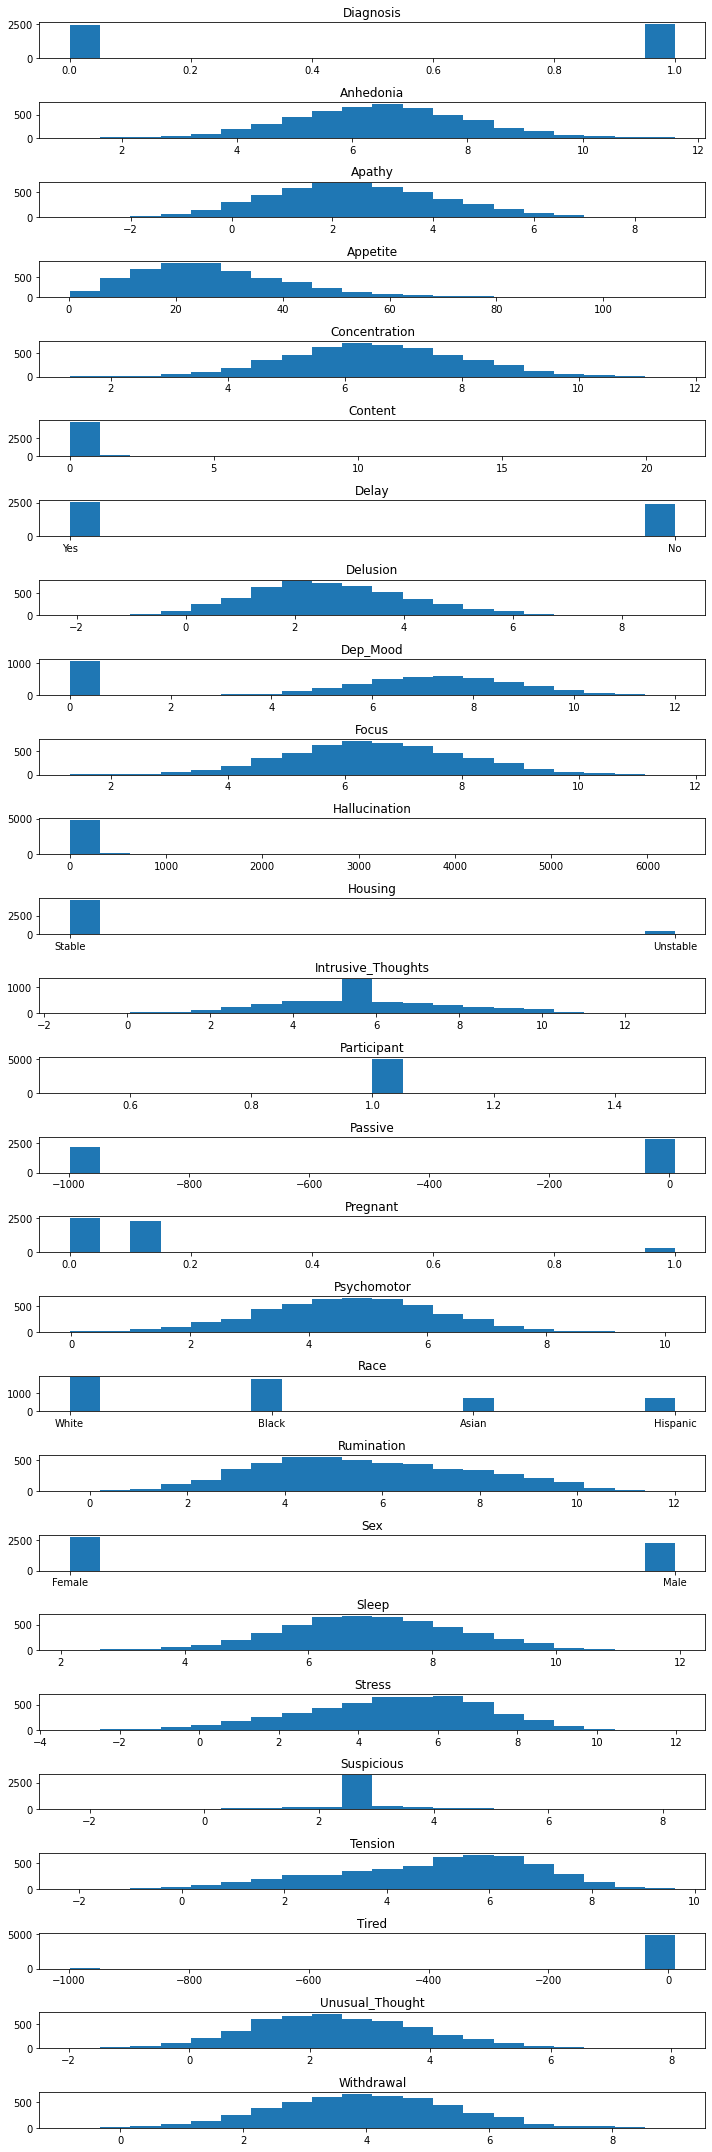

In [8]:
import matplotlib.pyplot as plt

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10,30))

# Iterate over all columns
for i, col in enumerate(data.columns):
    # Create a histogram for the current column
    axs[i].hist(data[col], bins=20)
    axs[i].set_title(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Handle outlier values
cols = data.select_dtypes(['float64']).columns # select numerical columns

for col in cols:
  data[[col]] = scaler.fit_transform(data[[col]])

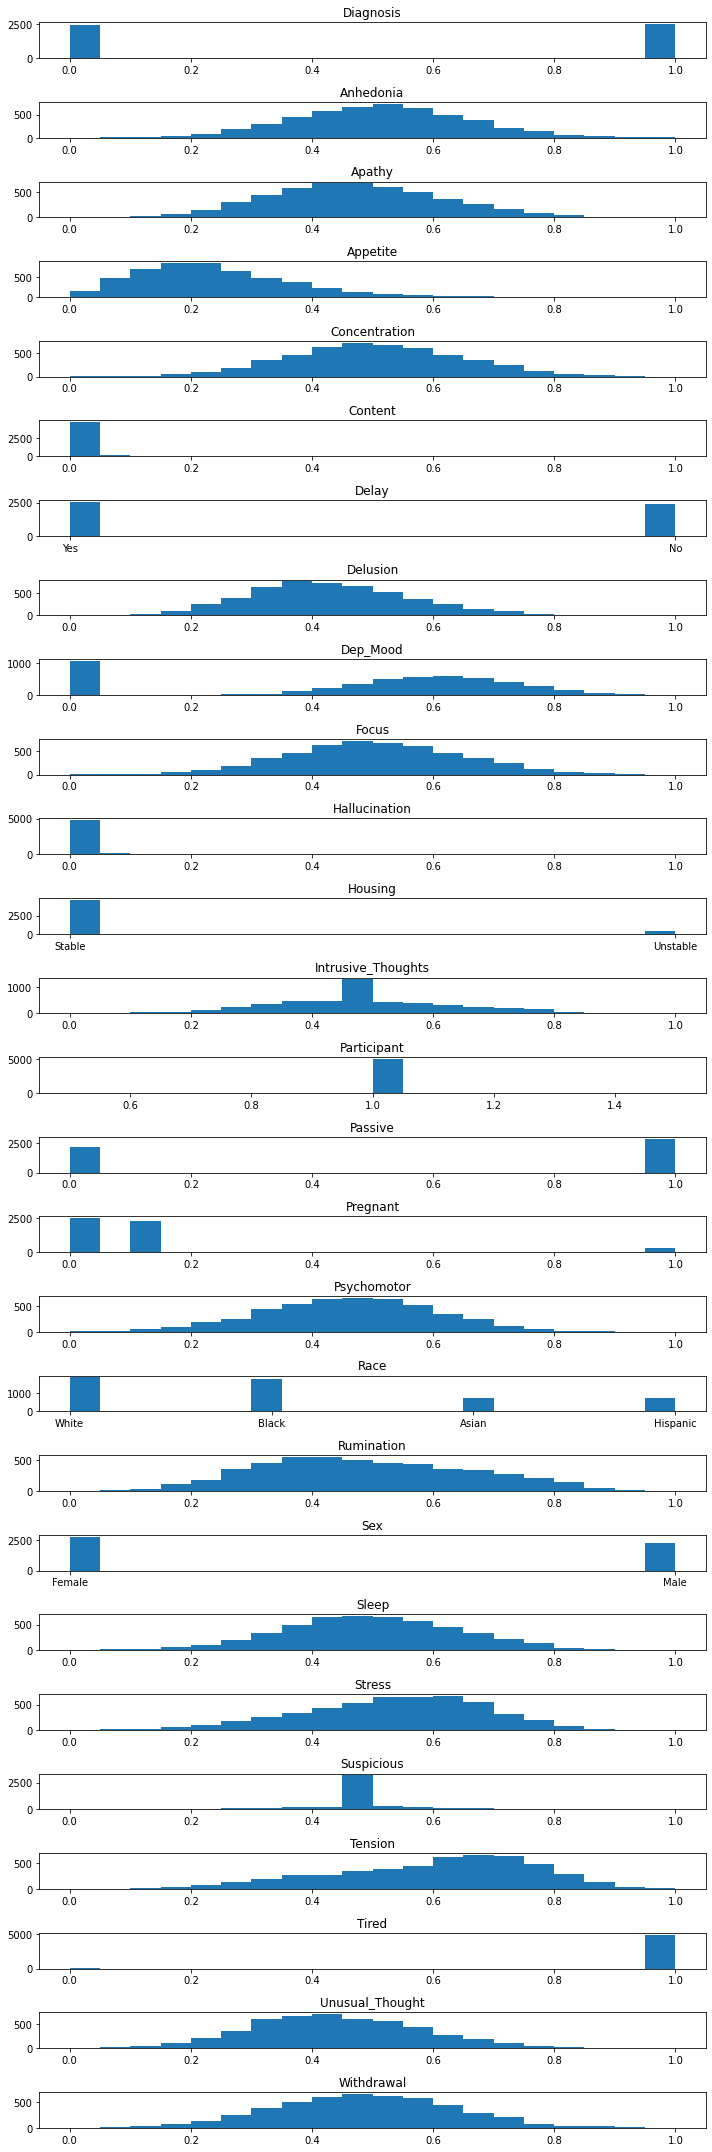

In [10]:
import matplotlib.pyplot as plt

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10,30))

# Iterate over all columns
for i, col in enumerate(data.columns):
    # Create a histogram for the current column
    axs[i].hist(data[col], bins=20)
    axs[i].set_title(col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Encoding Categorical Features



In [11]:
data.columns

Index(['Diagnosis', 'Anhedonia', 'Apathy', 'Appetite', 'Concentration',
       'Content', 'Delay', 'Delusion', 'Dep_Mood', 'Focus', 'Hallucination',
       'Housing', 'Intrusive_Thoughts', 'Participant', 'Passive', 'Pregnant',
       'Psychomotor', 'Race', 'Rumination', 'Sex', 'Sleep', 'Stress',
       'Suspicious', 'Tension', 'Tired', 'Unusual_Thought', 'Withdrawal'],
      dtype='object')

In [12]:
# Get the data types of each column in the dataset
data_types = data.dtypes

# Print the data types of each column
print(data_types)

# Filter only the categorical columns
cat_cols = data_types[data_types == 'object'].index
print("Categorical Features: ", cat_cols)

Diagnosis               int64
Anhedonia             float64
Apathy                float64
Appetite              float64
Concentration         float64
Content               float64
Delay                  object
Delusion              float64
Dep_Mood              float64
Focus                 float64
Hallucination         float64
Housing                object
Intrusive_Thoughts    float64
Participant             int64
Passive               float64
Pregnant              float64
Psychomotor           float64
Race                   object
Rumination            float64
Sex                    object
Sleep                 float64
Stress                float64
Suspicious            float64
Tension               float64
Tired                 float64
Unusual_Thought       float64
Withdrawal            float64
dtype: object
Categorical Features:  Index(['Delay', 'Housing', 'Race', 'Sex'], dtype='object')


In [13]:
# Select categorical columns
cat_cols = data.select_dtypes(['object']).columns

# Use get_dummies to encode categorical columns
data = pd.get_dummies(data, columns=cat_cols, prefix=cat_cols)


In [14]:
data

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,...,Delay_No,Delay_Yes,Housing_Stable,Housing_Unstable,Race_Asian,Race_Black,Race_Hispanic,Race_White,Sex_Female,Sex_Male
0,1,0.323924,0.521671,0.080697,0.676884,0.000284,0.296951,0.681289,0.676884,0.002037,...,0,1,1,0,0,0,0,1,1,0
1,0,0.412570,0.292875,0.226557,0.363319,0.002953,0.396151,0.929968,0.363319,0.006196,...,0,1,1,0,0,0,0,1,0,1
2,0,0.519659,0.149720,0.218018,0.502843,0.003397,0.321105,0.490469,0.502843,0.001792,...,1,0,1,0,0,1,0,0,1,0
3,0,0.412281,0.407607,0.212138,0.550257,0.013245,0.315800,0.745100,0.550257,0.000670,...,1,0,1,0,0,0,0,1,1,0
4,1,0.380891,0.216282,0.403075,0.441487,0.000192,0.302995,0.561636,0.441487,0.000133,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.643728,0.461712,0.169612,0.456590,0.000507,0.366479,0.844047,0.456590,0.001360,...,0,1,1,0,0,0,1,0,1,0
4996,0,0.863762,0.382599,0.110016,0.310514,0.009107,0.231433,0.577818,0.310514,0.000054,...,0,1,1,0,0,1,0,0,1,0
4997,1,0.359988,0.293206,0.343031,0.533128,0.000181,0.530990,0.425536,0.533128,0.009658,...,0,1,1,0,0,1,0,0,0,1
4998,1,0.589277,0.611446,0.338768,0.609803,0.005878,0.254881,0.460534,0.609803,0.000812,...,1,0,1,0,1,0,0,0,1,0


## Feature Extraction and Selection


Feature engineering, such as extraction and selection, is a critical part of pre-processing the dataset. In this section, we'll explore these techniques.

First, we extract features using PCA (Principal Component Analysis). PCA reduces dataset dimensionality by uncovering patterns in the data. Here, we use PCA from the `sklearn.decomposition` library and set `n_components` to `0.95` to retain 95% of the variance. This reduces feature count while preserving essential information.

Next, we select features using `SelectKBest`. This involves choosing the most relevant features that help build a model. In this code, we use `SelectKBest` from the `sklearn.feature_selection` library and set `k = 10` to select the top 10 features. We score features using the f_classif function based on their correlation with the target variable. This reduces the number of features and improves model performance.

Note that feature engineering is problem-specific. Different techniques and parameters can be used to achieve the same result. It's important to try different approaches and parameters to find the best solution for the dataset and problem.

In [15]:
from sklearn.decomposition import PCA

# Feature Extraction
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data.drop(columns=['Diagnosis']))

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# define the target variable
target = data['Diagnosis']
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
data_kbest = selector.fit_transform(data.drop(columns=['Diagnosis']), target)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


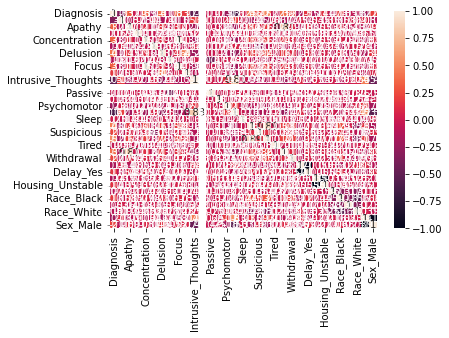

In [18]:
import seaborn as sns

# Correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Unsupervised Machine Learning Analysis 


We performs three different clustering algorithms on the dataset: KMeans cluster (KMeans), Mean Shift Clustering, and Spectral Clustering.

For the `kmeans`, the code uses the `KMeans` class from the `sklearn.cluster` library. It sets the number of components to 3, which represents the number of clusters to be formed in the data. The code then fits the scaled data to the GMM model and predicts the cluster assignments for each sample in the data using the predict method.

For `Mean Shift Clustering`, the code uses the `MeanShift` class from the `sklearn.cluster` library. It does not require the number of clusters to be specified, instead it automatically detects the number of clusters based on the data. The code then fits the scaled data to the Mean Shift model and predicts the cluster assignments for each sample in the data using the predict method.

For `Spectral Clustering`, the code uses the `SpectralClustering` class from `sklearn.cluster` library. It sets the number of clusters to 3. The code then fits the scaled data to the `Spectral Clustering` model and predicts the cluster assignments for each sample in the data using the predict method.

In [28]:
from sklearn.cluster import MeanShift, SpectralClustering
from sklearn.cluster import KMeans



# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
kmeans_labels = kmeans.labels_

# Mean Shift Clustering
ms = MeanShift()
ms_labels = ms.fit_predict(data)

# Spectral Clustering
sc = SpectralClustering(n_clusters=3)
sc_labels = sc.fit_predict(data)


Investigating the impact of dimensionality reduction on clustering performance and evaluating if a reduced number of features can sufficiently explain the observations.





In [29]:
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)

# Clustering after dimensionality reduction
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
kmeans_labels_pca = kmeans.labels_

Evaluating the performance of clustering algorithms is an important step in understanding the quality of the clusters obtained. There are several metrics that can be used to evaluate the performance of clustering algorithms on a dataset. Some common evaluation metrics are:

1. **Silhouette Score**: The silhouette score measures the similarity of an observation to its own cluster compared to other clusters. A high silhouette score indicates good cluster quality.

2. **Calinski-Harabasz Score**: The Calinski-Harabasz score measures the ratio of the sum of squares between the clusters to the sum of squares within the clusters. Higher values of the Calinski-Harabasz score indicate better cluster quality.

3. **Adjusted Rand Index**: The adjusted Rand index measures the similarity between two clusterings. A high adjusted Rand index indicates good cluster quality.

4. **Normalized Mutual Information**: The normalized mutual information measures the mutual information between two clusterings. A high normalized mutual information score indicates good cluster quality.

To evaluate the performance of the Gaussian Mixture Model, Mean Shift Clustering, and Spectral Clustering algorithms on the dataset, we can use the silhouette score or the Calinski-Harabasz score as evaluation metrics

In [34]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# K-means clustering
if len(np.unique(kmeans_labels)) > 2:
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    kmeans_ch = calinski_harabasz_score(data, kmeans_labels)
    print("KMeans Silhouette Score:", kmeans_silhouette)
    print("KMeans Calinski-Harabasz Score:", kmeans_ch)

# Mean Shift Clustering
if len(np.unique(ms_labels)) > 2:
    ms_silhouette = silhouette_score(data, ms_labels)
    ms_ch_score = calinski_harabasz_score(data, ms_labels)
    print("Mean Shift Silhouette Score:", ms_silhouette)
    print("Mean Shift Calinski-Harabasz Score:", ms_ch_score)

# Spectral Clustering
if len(np.unique(sc_labels)) > 2:
    sc_silhouette = silhouette_score(data, sc_labels)
    sc_ch_score = calinski_harabasz_score(data, sc_labels)
    print("Spectral Clustering Silhouette Score:", sc_silhouette)
    print("Spectral Clustering Calinski-Harabasz Score:", sc_ch_score)


# Dimensionality reduced K-means evaluation
kmeans_pca_silhouette = silhouette_score(data_pca, kmeans_labels_pca)
kmeans_pca_ch = calinski_harabasz_score(data_pca, kmeans_labels_pca)

print("Kmeans_pca_silhouette Score:", sc_silhouette)
print("Kmeans_pca_Calinski-Harabasz Score:", sc_ch_score)
  


KMeans Silhouette Score: 0.1776760013503835
KMeans Calinski-Harabasz Score: 1028.5461530149198
Spectral Clustering Silhouette Score: 0.15853049137254396
Spectral Clustering Calinski-Harabasz Score: 894.8103182099334
Kmeans_pca_silhouette Score: 0.15853049137254396
Kmeans_pca_Calinski-Harabasz Score: 894.8103182099334


## Applying various classification algorithms to accurately classify observations into either a case (Diagnosis=1) or control group (Diagnosis=0). Are there any biases present in the data?

In [35]:
data

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,...,Delay_No,Delay_Yes,Housing_Stable,Housing_Unstable,Race_Asian,Race_Black,Race_Hispanic,Race_White,Sex_Female,Sex_Male
0,1,0.323924,0.521671,0.080697,0.676884,0.000284,0.296951,0.681289,0.676884,0.002037,...,0,1,1,0,0,0,0,1,1,0
1,0,0.412570,0.292875,0.226557,0.363319,0.002953,0.396151,0.929968,0.363319,0.006196,...,0,1,1,0,0,0,0,1,0,1
2,0,0.519659,0.149720,0.218018,0.502843,0.003397,0.321105,0.490469,0.502843,0.001792,...,1,0,1,0,0,1,0,0,1,0
3,0,0.412281,0.407607,0.212138,0.550257,0.013245,0.315800,0.745100,0.550257,0.000670,...,1,0,1,0,0,0,0,1,1,0
4,1,0.380891,0.216282,0.403075,0.441487,0.000192,0.302995,0.561636,0.441487,0.000133,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.643728,0.461712,0.169612,0.456590,0.000507,0.366479,0.844047,0.456590,0.001360,...,0,1,1,0,0,0,1,0,1,0
4996,0,0.863762,0.382599,0.110016,0.310514,0.009107,0.231433,0.577818,0.310514,0.000054,...,0,1,1,0,0,1,0,0,1,0
4997,1,0.359988,0.293206,0.343031,0.533128,0.000181,0.530990,0.425536,0.533128,0.009658,...,0,1,1,0,0,1,0,0,0,1
4998,1,0.589277,0.611446,0.338768,0.609803,0.005878,0.254881,0.460534,0.609803,0.000812,...,1,0,1,0,1,0,0,0,1,0


The following code uses various supervised machine learning algorithms, such as `K-Nearest Neighbors`, `Naive Bayes`, and `Decision Trees`, to classify the observations in the dataset as cases (`Diagnosis=1`) or controls (`Diagnosis=0`). The code first defines the target variable and the features, and then splits the data into train and test sets using the train_test_split function from sklearn.model_selection. The four different algorithms are then trained and fit on the train data, and their predictions are obtained using the test data. The accuracy and F1-score of the predictions, as well as the classification report, are printed for each algorithm. The code also checks for bias by printing the confusion matrix for the predictions obtained from logistic regression.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define the target variable and the features
target = data['Diagnosis']
features = data.drop(columns=['Diagnosis'])

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy: ", accuracy_score(y_test, knn_pred))
print("F1-Score: ", f1_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("\nNaive Bayes")
print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("F1-Score: ", f1_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Trees")
print("Accuracy: ", accuracy_score(y_test, dt_pred))
print("F1-Score: ", f1_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


K-Nearest Neighbors
Accuracy:  0.905
F1-Score:  0.9015544041450777
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       512
           1       0.91      0.89      0.90       488

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.90      1000


Naive Bayes
Accuracy:  0.859
F1-Score:  0.8465723612622416
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       512
           1       0.90      0.80      0.85       488

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000


Decision Trees
Accuracy:  0.895
F1-Score:  0.8893572181243413
Classification Report:
               precision    recall  f1-score   support

           0       0.88      

The K-Nearest Neighbors algorithm has the highest accuracy and F1-score among the three models. However, it is recommended to consider both precision and recall as well as accuracy and F1-score, to ensure the best balance between false positives and false negatives. The Naive Bayes model has a lower accuracy and F1-score, but a higher precision, whereas the Decision Trees model has a similar performance to K-Nearest Neighbors, with a slightly lower accuracy and F1-score.

## Creating some regression models to predict the numerical features


In [37]:
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = data['Diagnosis']
features = data.drop(columns=['Diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Elastic Net Regression
enet = ElasticNet()
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_test)
print("Elastic Net Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, enet_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, enet_pred))
print("R-Squared: ", r2_score(y_test, enet_pred))

# Bayesian Ridge Regression
br = BayesianRidge()
br.fit(X_train, y_train)
br_pred = br.predict(X_test)
print("\nBayesian Ridge Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, br_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, br_pred))
print("R-Squared: ", r2_score(y_test, br_pred))

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("\nK-Nearest Neighbors Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, knn_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, knn_pred))
print("R-Squared: ", r2_score(y_test, knn_pred))

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print("\nSupport Vector Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, svr_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, svr_pred))
print("R-Squared: ", r2_score(y_test, svr_pred))

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, dt_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dt_pred))
print("R-Squared: ", r2_score(y_test, dt_pred))

Elastic Net Regression
Mean Squared Error:  0.25035106250000005
Mean Absolute Error:  0.500246
R-Squared:  -0.0019813912813779755

Bayesian Ridge Regression
Mean Squared Error:  0.07892341069903816
Mean Absolute Error:  0.22553315627830545
R-Squared:  0.6841244128656581

K-Nearest Neighbors Regression
Mean Squared Error:  0.07568000000000001
Mean Absolute Error:  0.1616
R-Squared:  0.6971055327868854

Support Vector Regression
Mean Squared Error:  0.05808082289682628
Mean Absolute Error:  0.18465235918742973
R-Squared:  0.767542813073025

Decision Tree Regression
Mean Squared Error:  0.106
Mean Absolute Error:  0.106
R-Squared:  0.5757556352459017


These results indicate how well the regression algorithms are able to predict the target variable. The evaluation metrics used here are mean squared error (MSE), mean absolute error (MAE) and R-squared.

* A lower MSE and MAE indicates a better fit of the model to the test data, as it means the model is making smaller errors in its predictions.

* R-squared is a measure of goodness of fit, with higher values indicating a better fit of the model. R-squared values range between -1 and 1, with negative values indicating a poor fit.

Based on these results, the best performing algorithms are Support Vector Regression and K-Nearest Neighbors Regression, followed by Bayesian Ridge Regression. Decision Tree Regression has a lower R-squared and higher MSE/MAE, indicating a poorer fit of the model to the test data. Elastic Net Regression has a negative R-squared, which indicates a very poor fit of the model to the data.